In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pip install mlxtend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**## **Preprocessing and Data Loading**

In [ ]:
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks'
os.chdir(path)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
orders=pd.read_csv('/content/orders.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
aisles=pd.read_csv('aisles.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dep=pd.read_csv('deparments.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
order_products_prior=pd.read_csv('/content/order_products__prior.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
order_products__train=pd.read_csv('/content/order_products__train.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
sample_sub=pd.read_csv('sample_sub.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
products=pd.read_csv('/content/products.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(products.head())
print("-------------------------------------")
print(order_products__train.head())
print("-------------------------------------")
print(order_products_prior.head())
print("-------------------------------------")
print(orders.head())

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
-------------------------------------
   order_id  product_id  add_to_cart_order  reordered
0         1     49302.0                1.0        1.0
1         1     11109.0                2.0        1.0
2         1     10246.0                3.0        0.0
3         1     49683.0                4.0        0.0
4         1     43633.0                5.0        1.0
-------------------------------------
   order_id  prod

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(products.info())
print("-------------------------------------")
print(order_products__train.info())
print("-------------------------------------")
print(order_products_prior.info())
print("-------------------------------------")
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247172 entries, 0 to 247171
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   order_id           247172 non-null  int64  
 1   product_id         247171 non-null  float64
 2   add_to_cart_order  247171 non-null  float64
 3   reordered          247171 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 7.5 MB
None
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeI

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)




```
# This is formatted as code
```

## **Merge Datasetst**

In [ ]:
order_products_all = pd.concat([order_products__train, order_products_prior], axis=0)
order_products_all = order_products_all.merge(products[['product_id', 'product_name']], on='product_id', how='left')
order_products_all = order_products_all.merge(orders[['order_id', 'user_id']], on='order_id', how='left')

print(order_products_all.head())

   order_id  product_id  add_to_cart_order  reordered  \
0         1     49302.0                1.0        1.0   
1         1     11109.0                2.0        1.0   
2         1     10246.0                3.0        0.0   
3         1     49683.0                4.0        0.0   
4         1     43633.0                5.0        1.0   

                                    product_name  user_id  
0                               Bulgarian Yogurt      NaN  
1  Organic 4% Milk Fat Whole Milk Cottage Cheese      NaN  
2                          Organic Celery Hearts      NaN  
3                                 Cucumber Kirby      NaN  
4           Lightly Smoked Sardines in Olive Oil      NaN  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### **Frequency count of each unique value in the 'product_name' column¶**


In [ ]:
product_frequency_count = order_products_all['product_name'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
top_10_product_frequency_count = product_frequency_count.head(10)
top_10_product_frequency_count.columns = ['product_name', 'frequency_count']
top_10_product_frequency_count.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
product_name,
Banana,7240
Bag of Organic Bananas,5968
Organic Strawberries,4034
Organic Baby Spinach,3700
Organic Hass Avocado,3066
Organic Avocado,2791
Large Lemon,2648
Strawberries,2357
Limes,2171


In [ ]:
product_frequency_count= product_frequency_count.reset_index()

product_frequency_count.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,product_name,count
0,Banana,7240
1,Bag of Organic Bananas,5968
2,Organic Strawberries,4034
3,Organic Baby Spinach,3700
4,Organic Hass Avocado,3066


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


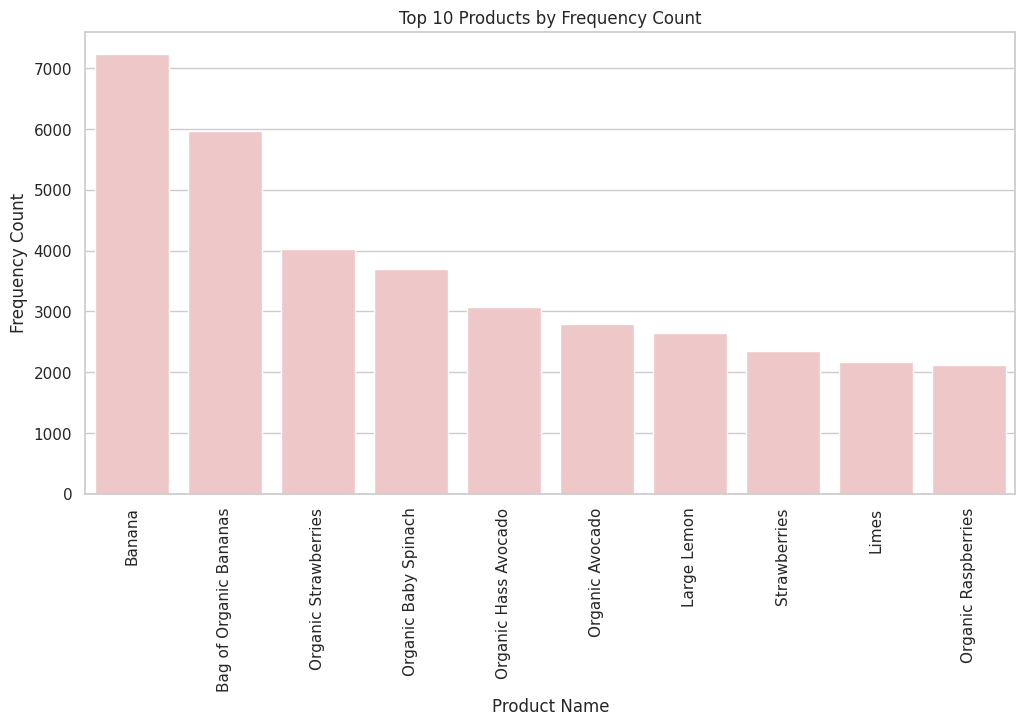

In [ ]:
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_product_frequency_count, x='product_name', y='frequency_count', color='#F4C2C2')
plt.xticks(rotation=90)
plt.xlabel('Product Name')
plt.ylabel('Frequency Count')
plt.title('Top 10 Products by Frequency Count')

# Display the plot
plt.show()

## **Convert Data into Transactional Format**

In [ ]:
basket = order_products_all.groupby(['order_id'])['product_name'].apply(list).reset_index()
print(basket.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   order_id                                       product_name
0         1  [Bulgarian Yogurt, Organic 4% Milk Fat Whole M...
1         2  [Organic Egg Whites, Michigan Organic Kale, Ga...
2         3  [Total 2% with Strawberry Lowfat Greek Straine...
3         4  [Plain Pre-Sliced Bagels, Honey/Lemon Cough Dr...
4         5  [Bag of Organic Bananas, Just Crisp, Parmesan,...


# **Convert the Transaction Data into a One-Hot Encoded Format**

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(basket['product_name']).transform(basket['product_name'])
df_basket = pd.DataFrame(te_ary, columns=te.columns_)
print(df_basket.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   #2 Coffee Filters  #2 Cone White Coffee Filters  #2 Mechanical Pencils  \
0              False                         False                  False   
1              False                         False                  False   
2              False                         False                  False   
3              False                         False                  False   
4              False                         False                  False   

   #4 Natural Brown Coffee Filters  #NAME?  \
0                            False   False   
1                            False   False   
2                            False   False   
3                            False   False   
4                            False   False   

   & Go! Hazelnut Spread + Pretzel Sticks  \
0                                   False   
1                                   False   
2                                   False   
3                                   False   
4                                  

## **Apply the Apriori Algorithm**

In [ ]:
frequent_itemsets = apriori(df_basket, min_support=0.01, use_colnames=True)
print(frequent_itemsets.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


    support                    itemsets
0  0.010864    (100% Raw Coconut Water)
1  0.018078    (100% Whole Wheat Bread)
2  0.011654       (2% Reduced Fat Milk)
3  0.021909  (Apple Honeycrisp Organic)
4  0.024811                 (Asparagus)


## **Generate Association Rules**

In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

              antecedents               consequents   support  confidence  \
0  (Organic Baby Spinach)  (Bag of Organic Bananas)  0.016418    0.218568   
1  (Organic Hass Avocado)  (Bag of Organic Bananas)  0.018599    0.306739   
2   (Organic Raspberries)  (Bag of Organic Bananas)  0.013147    0.310557   
3  (Organic Strawberries)  (Bag of Organic Bananas)  0.021049    0.255713   
4           (Large Lemon)                  (Banana)  0.014552    0.267515   

       lift  
0  1.850631  
1  2.597180  
2  2.629505  
3  2.165136  
4  1.841087  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Visualize the Results**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


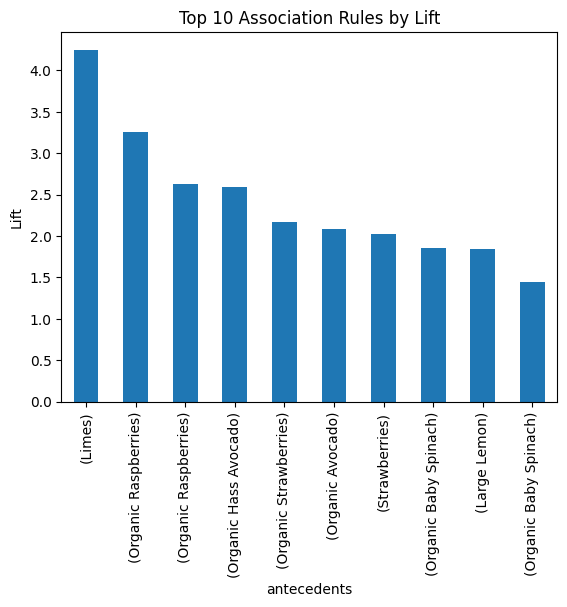

In [ ]:
rules.sort_values('lift', ascending=False).head(10).plot(kind='bar', x='antecedents', y='lift', legend=False)
plt.title('Top 10 Association Rules by Lift')
plt.ylabel('Lift')
plt.show()